In [1]:
import pandas as pd
import numpy as np
from glob import glob
from prediction.functions import new_r2
from prediction.functions import *

In [2]:
PREDICTION_MODEL = ['lasso', 'ridge', 'enet', 'random_forest', 'lgb', 'nn3']
FS_METHODS = ['all', 'granger', 'huang', 'IAMB', 'mda', 'mdi', 'MMMB', 'sfi']
EVALUATION_START = '2012-07-03'
TICKER_NAMES = ['SPX Index']
TITLE = 'OOS Cummulative Returns for each Feature Selection Method given a Prediction Model'
BENCHMARK_NAME = 'return'

In [3]:
melt_predictions_df, melt_benchmark_df, melt_r2_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                  fs_models=FS_METHODS,
                                                                                  evaluation_start_date=EVALUATION_START,
                                                                                  ticker_names=TICKER_NAMES,
                                                                                  benchmark_name=BENCHMARK_NAME)

/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [4]:
pred_ret_df, pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=melt_predictions_df,
                                                                 target_asset_returns=melt_benchmark_df)

# R2

In [5]:
r2_tb, agg_fs_r2_tb, agg_fore_r2_tb = plot_df_to_table(df=melt_r2_df,
                                                       index=['ticker', 'fs'],
                                                       columns=['model'],
                                                       values=['r2'],
                                                       apply_factor_to_table=100)

In [6]:
r2_tb

In [7]:
agg_fs_r2_tb

In [8]:
agg_fore_r2_tb

# Cummulative returns

## Grouped by Feature Selection Model

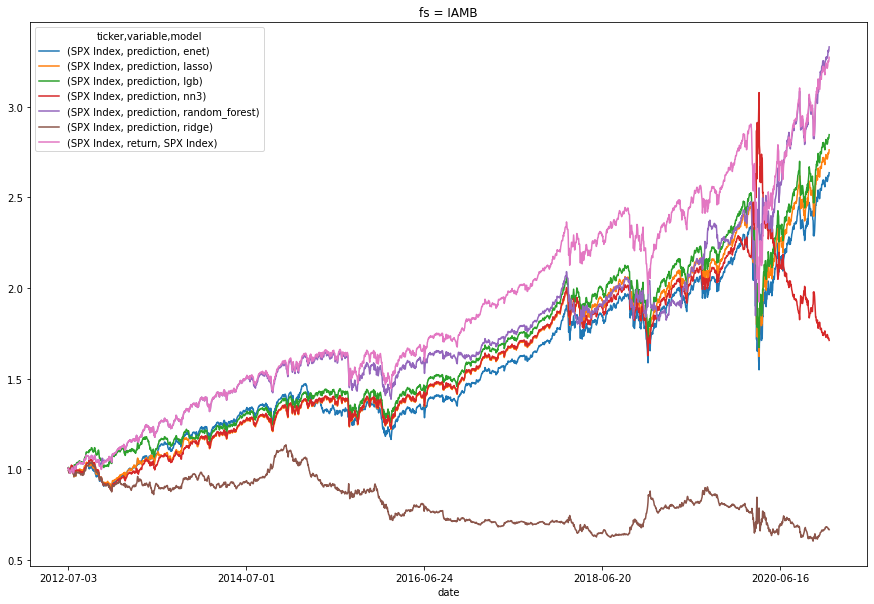

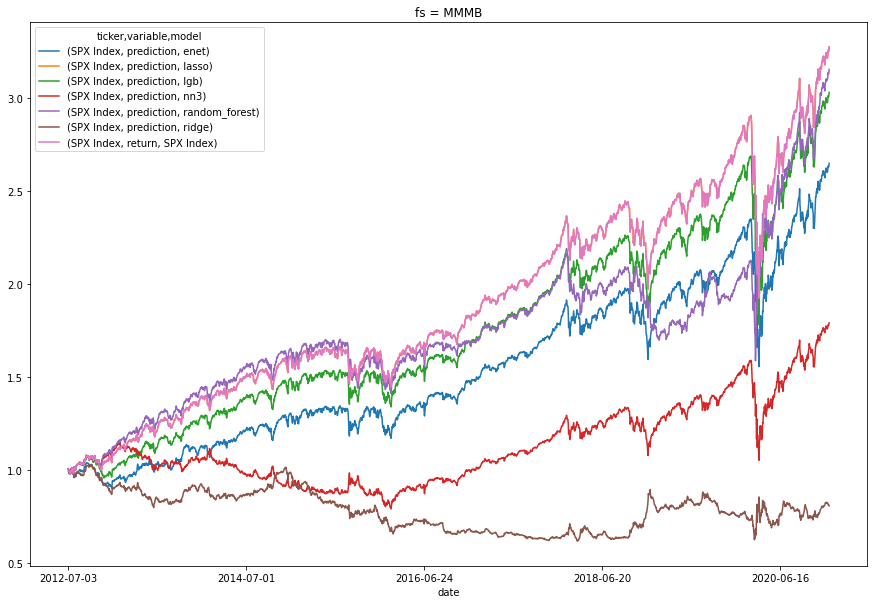

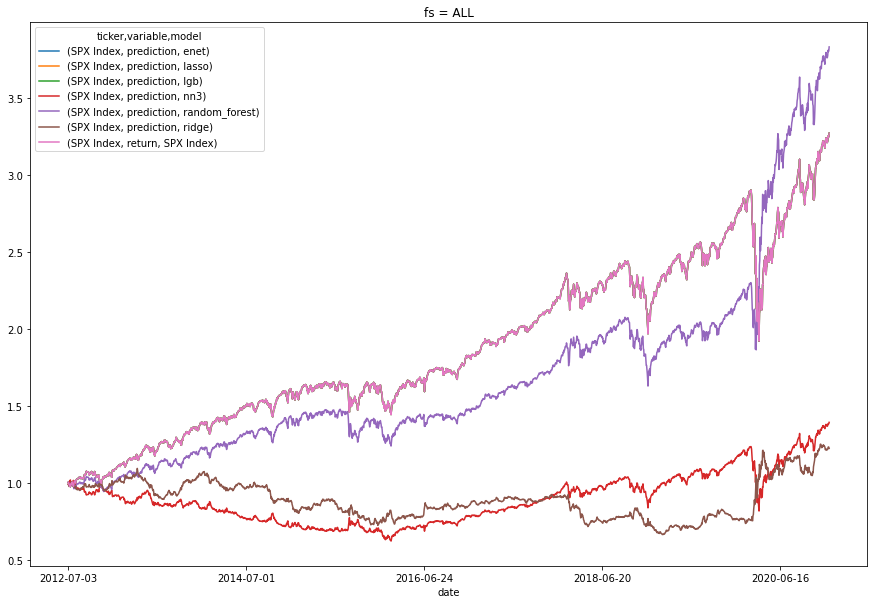

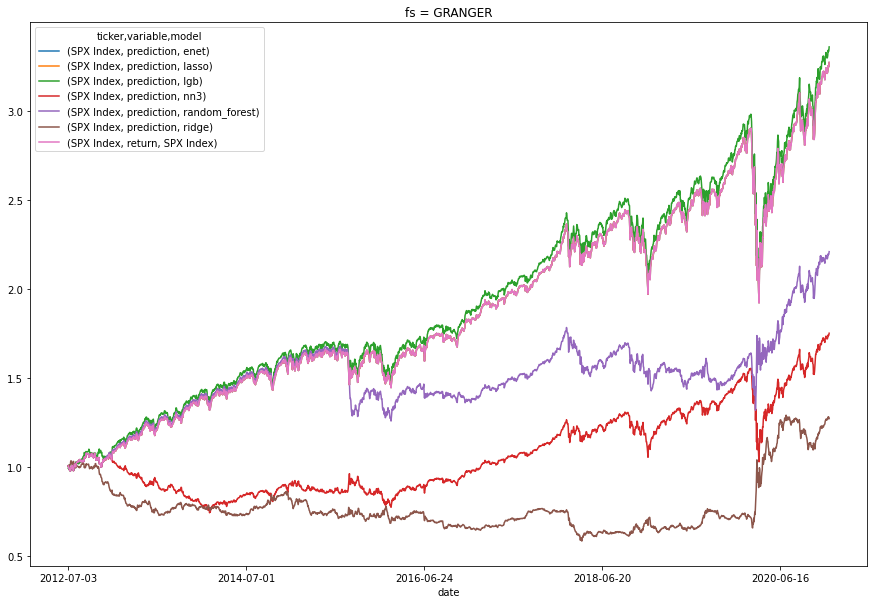

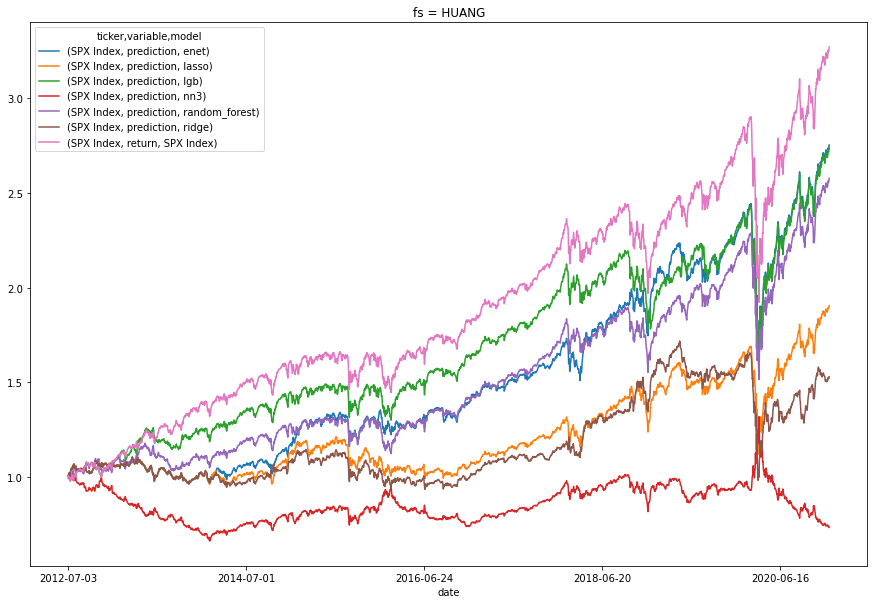

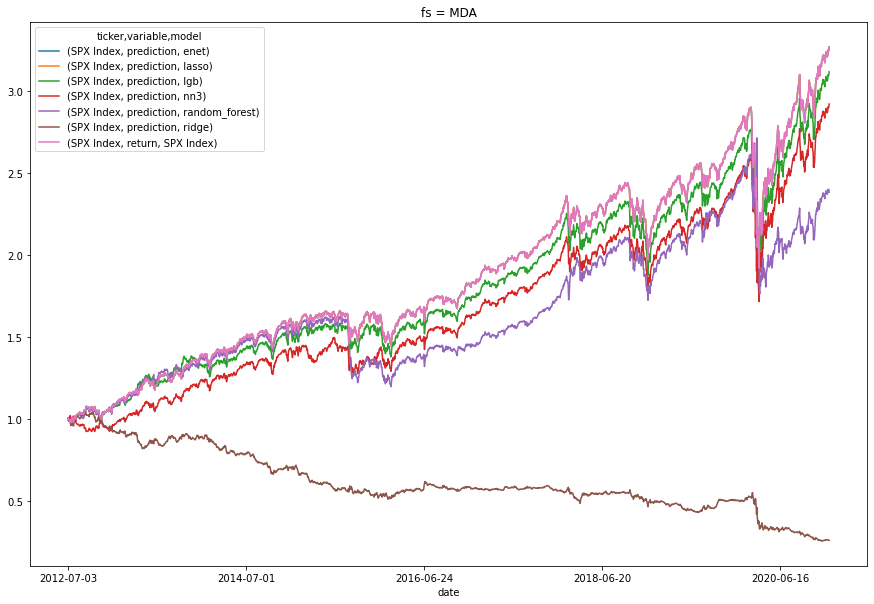

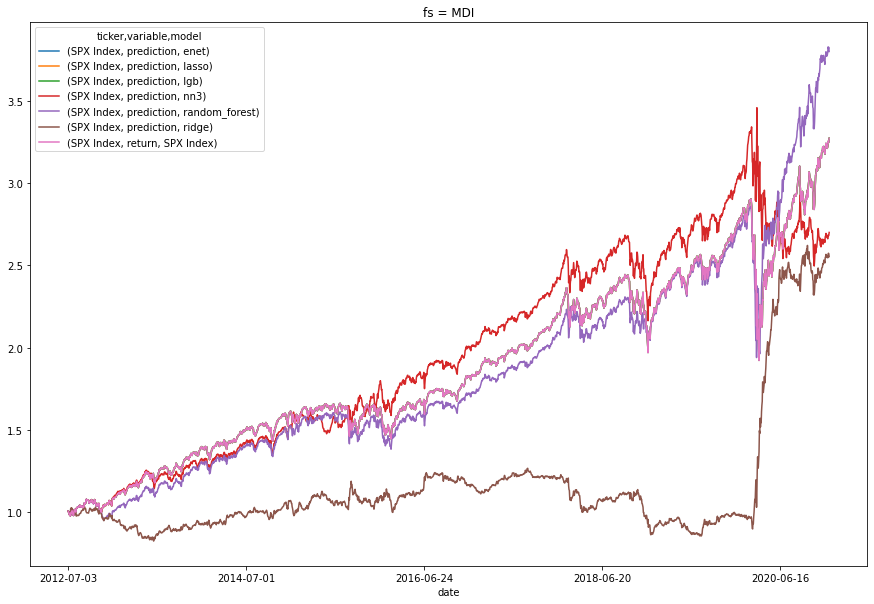

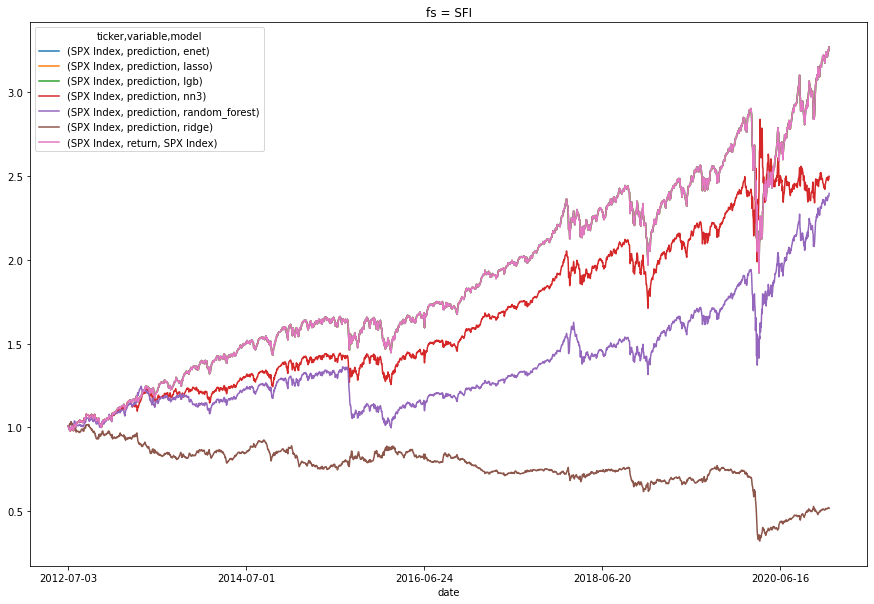

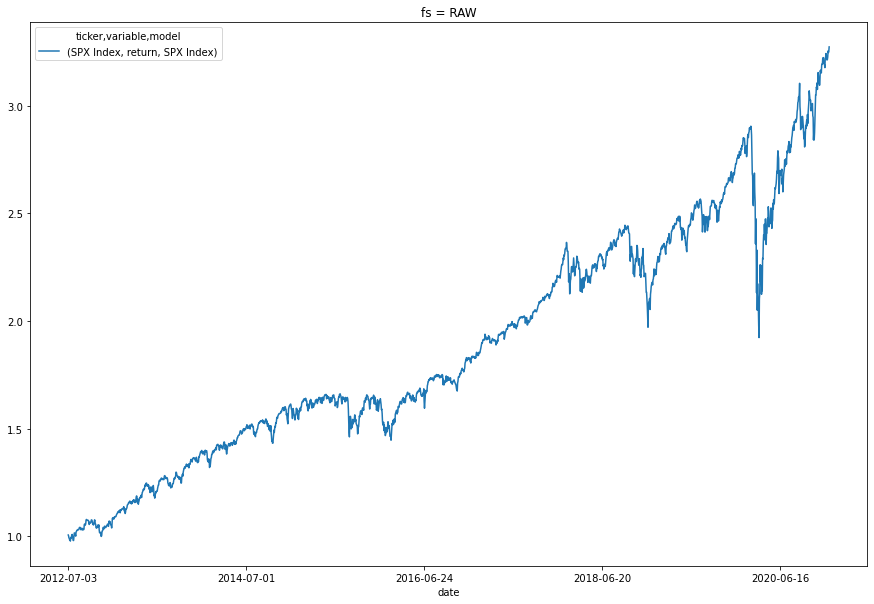

In [9]:
cum_ret_df2 = plot_cum_ret(pred_ret_df=pred_ret_df,
                           benchmark_df=melt_benchmark_df,
                           level_to_subset='fs',
                           show=True)

## Grouped by Prediction Model

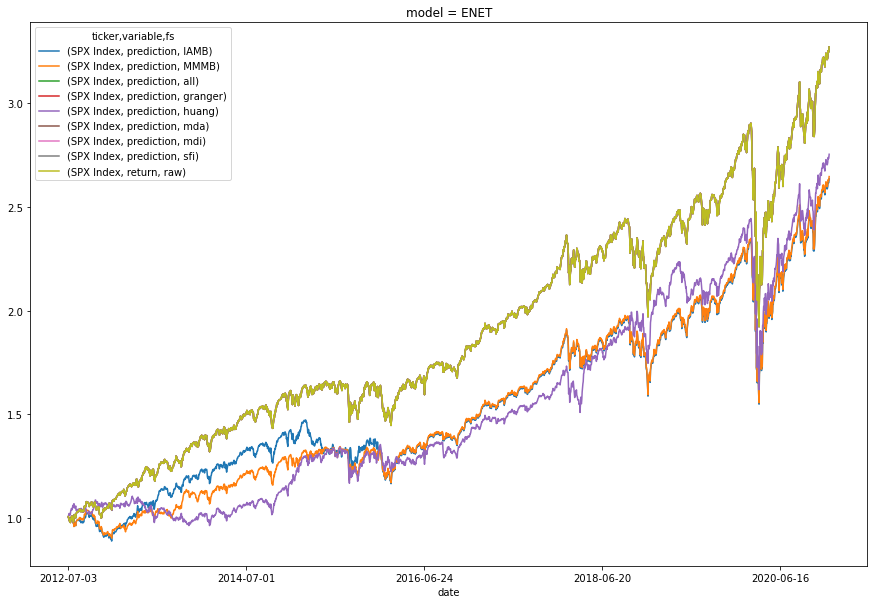

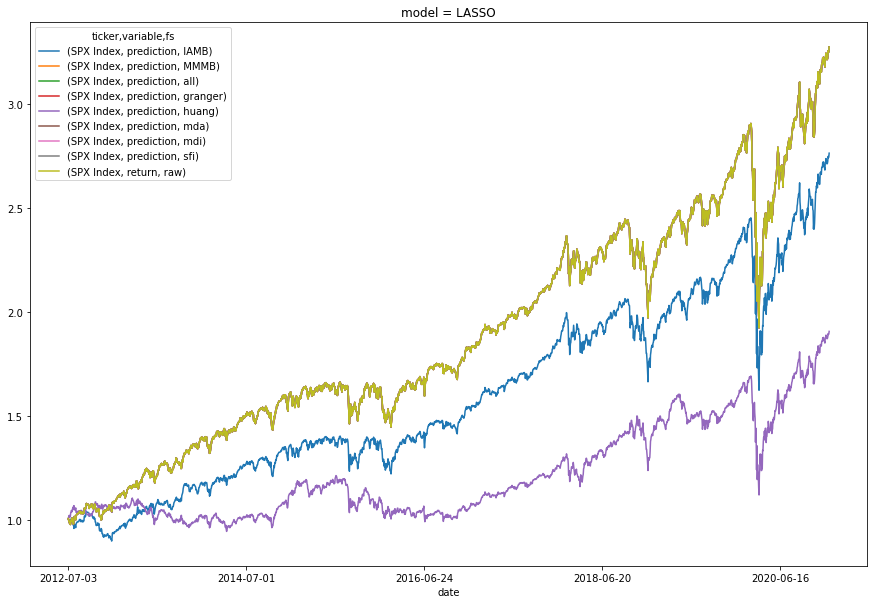

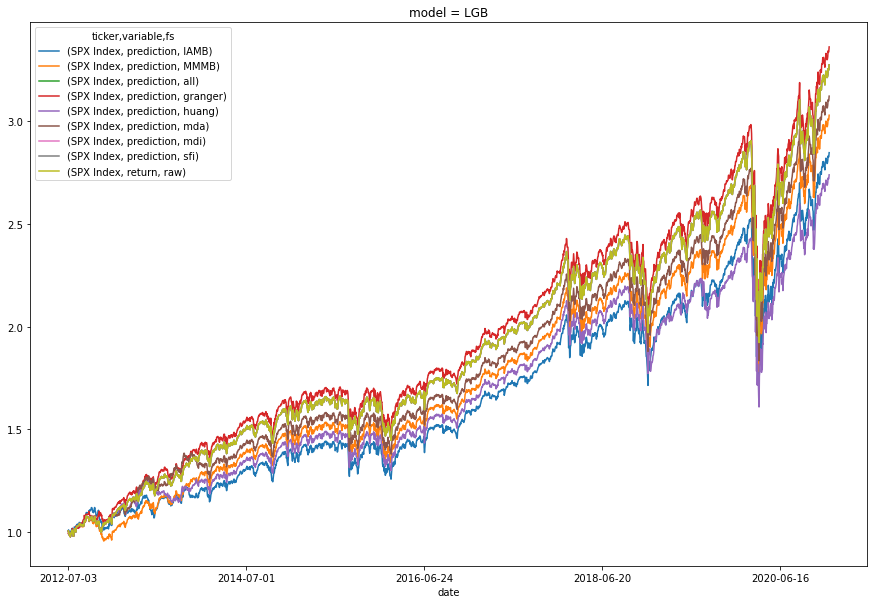

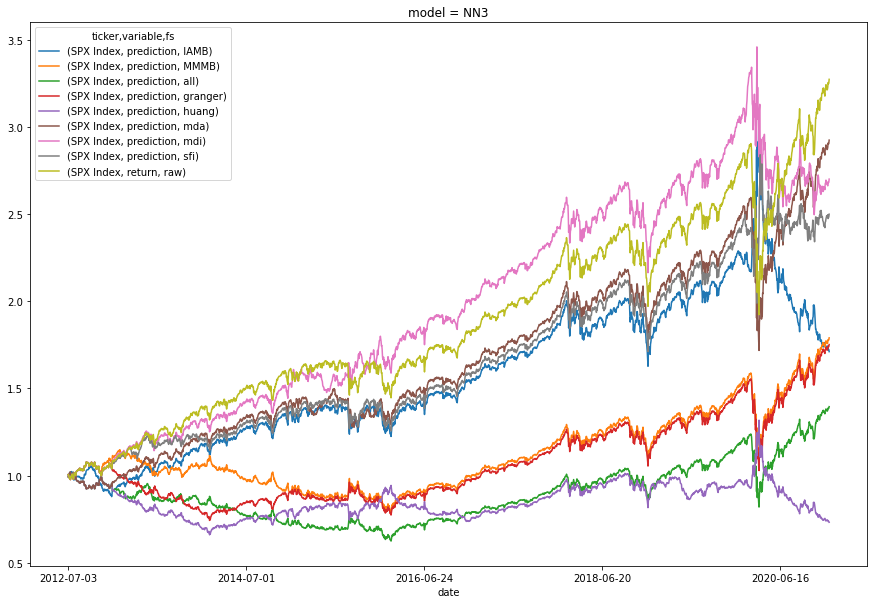

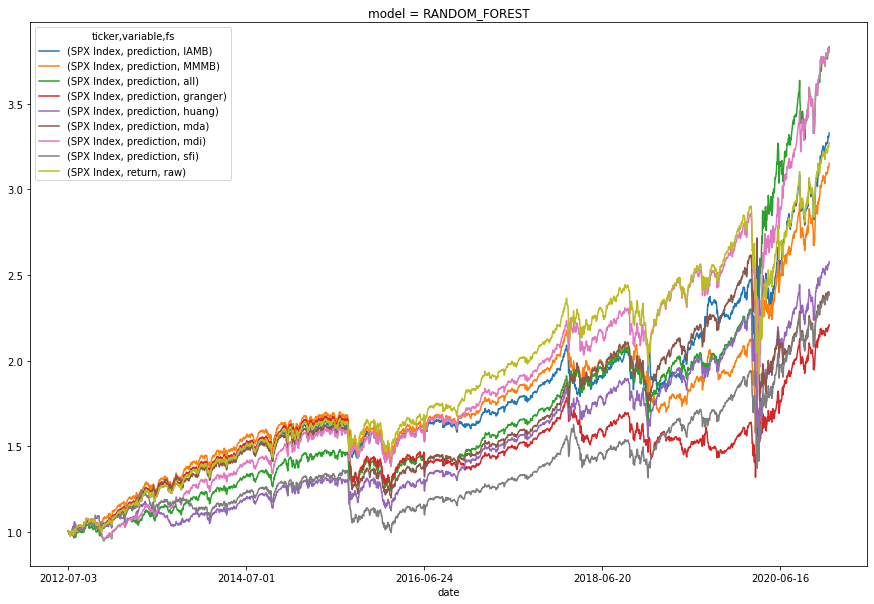

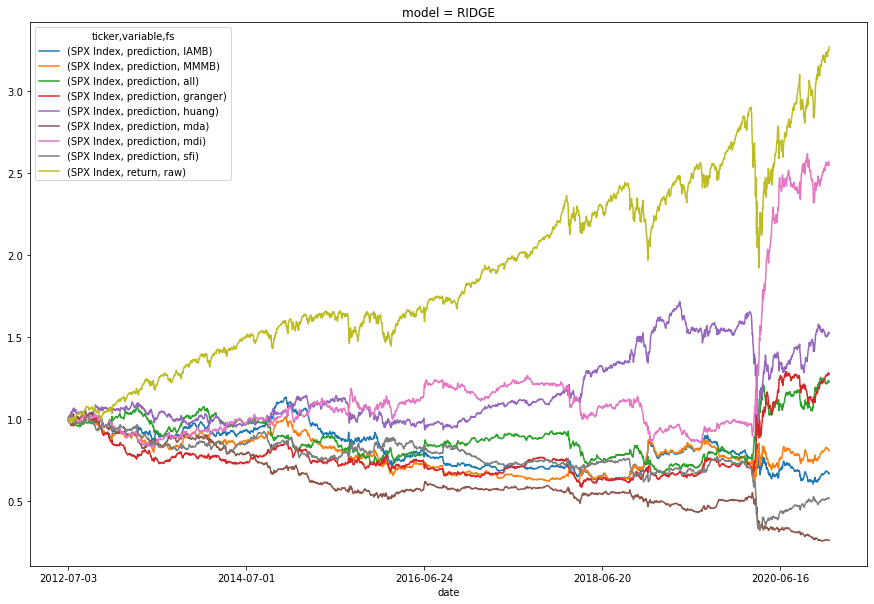

In [11]:
cum_ret_df = plot_cum_ret(pred_ret_df=pred_ret_df,
                          benchmark_df=melt_benchmark_df,
                          level_to_subset='model',
                          show=True)

# Portfolio Metrics

In [12]:
ret_all_df = pd.concat([pred_ret_df, melt_benchmark_df], axis=0)
pivot_ret_all_df = ret_all_df.pivot_table(index=['date'], columns=['variable', 'ticker', 'model', 'fs'], values=['value'])

## Sharpe ratio

In [13]:
sr_rank_df, sr_tb_df, sr_agg_df = sharpe_ratio_tb(returns_df=ret_all_df,
                                                  rf=.0)

In [14]:
sr_rank_df

sharpe ratio
ticker    variable   model         fs                   
SPX Index prediction random_forest all          1.023986
                                   mdi          1.018073
                     lgb           granger      0.932157
                     random_forest IAMB         0.925699
          return     SPX Index     raw          0.913600
          prediction lasso         granger      0.913600
                     lgb           sfi          0.913600
                                   mdi          0.913600
                                   all          0.913600
                     lasso         sfi          0.913600
                                   mda          0.913600
                                   mdi          0.913600
                                   all          0.913600
                     enet          sfi          0.913600
                                   mdi          0.913600
                     lasso         MMMB         0.913600
                     enet          mda          0.913600
                                   all          0.913600
                                   granger      0.913600
                     random_forest MMMB         0.886952
                     lgb           mda          0.880327
                                   MMMB         0.859163
                     nn3           mda          0.834678
                     lgb           IAMB         0.815709
                     lasso         IAMB         0.794736
                     enet          huang        0.792818
                     lgb           huang        0.788681
                     nn3           mdi          0.778677
                     enet          MMMB         0.764929
                                   IAMB         0.762091
                     random_forest huang        0.746478
                     ridge         mdi          0.738536
                     nn3           sfi          0.724314
                     random_forest sfi          0.695513
                                   mda          0.692309
                                   granger      0.638345
                     lasso         huang        0.535066
                     nn3           MMMB         0.491413
                                   granger      0.476327
                                   IAMB         0.459428
                     ridge         huang        0.381632
                     nn3           all          0.317609
                     ridge         granger      0.252197
                                   all          0.227048
                                   MMMB        -0.064499
                     nn3           huang       -0.132437
                     ridge         IAMB        -0.197376
                                   sfi         -0.375178
                                   mda         -0.854822

In [15]:
sr_tb_df

In [16]:
sr_agg_df

## Max Drawdown

In [17]:
md_rank_df, md_tb_df, md_agg_df = max_drawdown_tb(pivot_ret_all_df=pivot_ret_all_df)

In [18]:
md_rank_df

max drawdown
variable   ticker    model         fs                   
prediction SPX Index random_forest all         -0.214737
                     nn3           sfi         -0.219324
                     random_forest IAMB        -0.253855
                                   granger     -0.260240
                                   MMMB        -0.271659
                     nn3           mdi         -0.278116
                     random_forest sfi         -0.294094
                                   mdi         -0.321627
                     ridge         mdi         -0.324908
                     random_forest huang       -0.337904
                     lasso         MMMB        -0.337904
                                   all         -0.337904
                                   granger     -0.337904
                     enet          mdi         -0.337904
                     lasso         mda         -0.337904
                                   mdi         -0.337904
                                   sfi         -0.337904
return     SPX Index SPX Index     raw         -0.337904
prediction SPX Index enet          sfi         -0.337904
                                   granger     -0.337904
                                   all         -0.337904
                     lgb           mdi         -0.337904
                                   sfi         -0.337904
                     enet          mda         -0.337904
                     lgb           all         -0.337904
                     enet          IAMB        -0.337904
                                   huang       -0.337904
                     lgb           IAMB        -0.337904
                                   huang       -0.337904
                     lasso         huang       -0.337904
                                   IAMB        -0.337904
                     lgb           mda         -0.337904
                                   MMMB        -0.337904
                                   granger     -0.337904
                     nn3           mda         -0.337904
                     enet          MMMB        -0.337904
                     nn3           MMMB        -0.337904
                                   granger     -0.337904
                     random_forest mda         -0.350534
                     nn3           all         -0.388233
                     ridge         all         -0.391322
                                   MMMB        -0.400009
                                   huang       -0.428313
                                   granger     -0.435665
                     nn3           huang       -0.443924
                                   IAMB        -0.443924
                     ridge         IAMB        -0.467250
                                   sfi         -0.690154
                                   mda         -0.755698

In [19]:
md_tb_df

In [20]:
md_agg_df

# Turnover - definicao no kelly